## Tutorial : Functional API

from https://www.tensorflow.org/guide/keras/functional

Execuitve Summary:
    write after coding is done together w/ clean comments and docum.

key-learnings / difficulties
    - 

steps

In [1]:
# Setup
import numpy as np

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

tf.keras.backend.clear_session()  # For easy reset of notebook state.

In [2]:
# functional Api 
# more flexibal, can handle non-linear topography 
# usually directed-acyclic gradph (DAG)
# possible with multiple inputs and outputs



In [3]:
# create layers

inputs = layers.Input(shape=(784,))

dense = layers.Dense(64, activation = 'relu')
x = dense(inputs)

In [4]:
x = layers.Dense(64, activation = 'relu')(x)
outputs = layers.Dense(10)(x)

In [6]:
model = keras.Model(inputs= (inputs), outputs=outputs, name= "mnist_model")

In [8]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


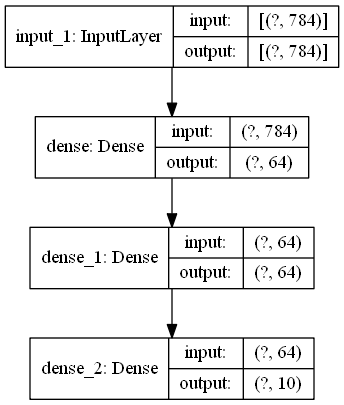

In [10]:
keras.utils.plot_model(model, 'my_first_model.png', show_shapes = True)

In [11]:

# connection arrows are replaced by call operation ( in code above)

In [13]:
## train, evaluate and inference

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# reshape into vectors and scale (since light intensities 1 byte = 255, so values btw 0-1)
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

model.compile(loss= keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             optimizer= keras.optimizers.RMSprop(),
              metrics = ['accuracy'])

history = model.fit(x_train, y_train,
                   epochs = 5,
                   batch_size= 64,
                   validation_split=0.2)

model.evaluate(x_test, y_test, verbose = 2)


11493376/11490434 [==============================] - 6s 1us/step
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 95us/sample - loss: 0.3411 - accuracy: 0.9026 - val_loss: 0.1840 - val_accuracy: 0.9454
Epoch 2/5
48000/48000 [==============================] - 4s 73us/sample - loss: 0.1615 - accuracy: 0.9524 - val_loss: 0.1353 - val_accuracy: 0.9597
Epoch 3/5
48000/48000 [==============================] - 3s 65us/sample - loss: 0.1185 - accuracy: 0.9645 - val_loss: 0.1247 - val_accuracy: 0.9630
Epoch 4/5
48000/48000 [==============================] - 3s 61us/sample - loss: 0.0945 - accuracy: 0.9718 - val_loss: 0.1148 - val_accuracy: 0.9665
Epoch 5/5
48000/48000 [==============================] - 3s 64us/sample - loss: 0.0793 - accuracy: 0.9765 - val_loss: 0.1099 - val_accuracy: 0.9691
10000/10000 - 1s - loss: 0.0987 - accuracy: 0.9700


[0.09869653374943882, 0.97]

In [14]:
## Save and serialize

model.save("path_to_my_model")

del model

# recreate
model = keras.models.load_model('path_to_my_model')



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: path_to_my_model\assets
